In [271]:
# 1. EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [273]:
df=pd.read_csv('ToyotaCorolla - MLR.csv') # importing the dataset
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [275]:
df.info()  #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [277]:
df.shape # this gives the size of the dataset

(1436, 11)

In [279]:
df.dtypes  # this gives the type of the features present in the dataset.

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [281]:
df.describe() # gives the sumary statistics of the features

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [283]:
df.isnull().sum() # checking for missing or null values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [285]:
df[df.duplicated()] # to check duplicated rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [287]:
df.columns[df.columns.duplicated()] # to check duplicated coluns

Index([], dtype='object')

In [289]:
df = df.drop_duplicates().reset_index(drop=True) # droping the duplicated rows
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [291]:
# renaming the columns
df = df.rename({'Age_08_04':'Age'},axis=1)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


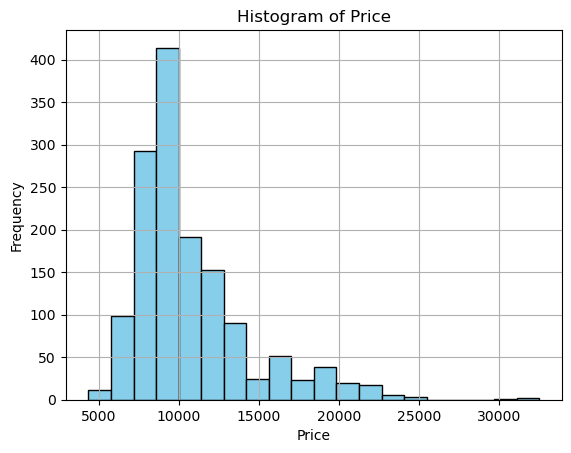

Skewness: 1.69
positively skewed


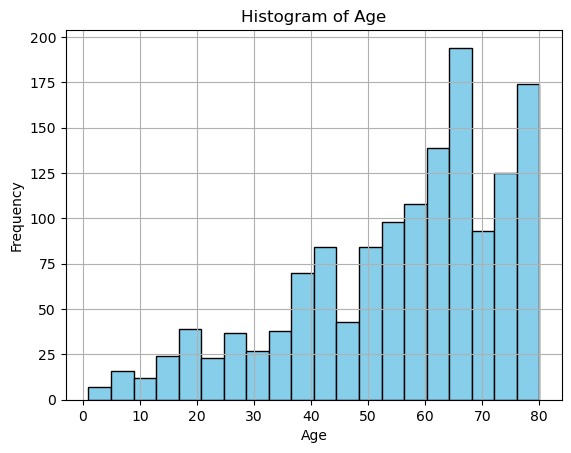

Skewness: -0.82
negatively skewed


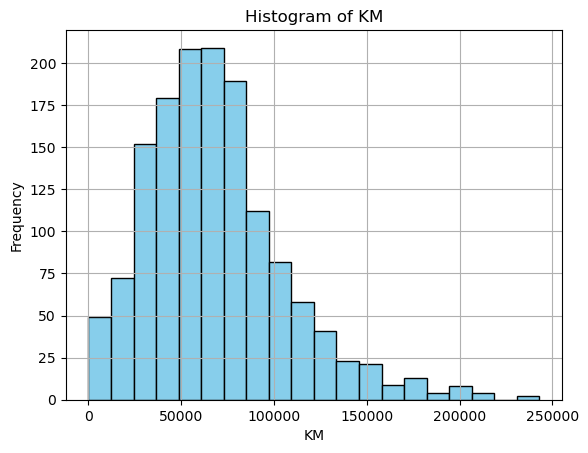

Skewness: 1.02
positively skewed


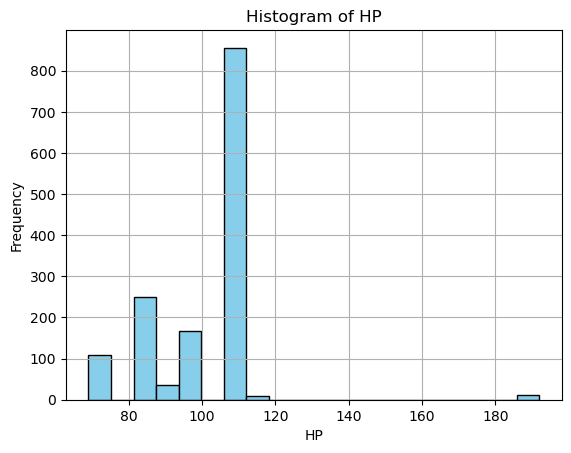

Skewness: 0.96
negatively skewed


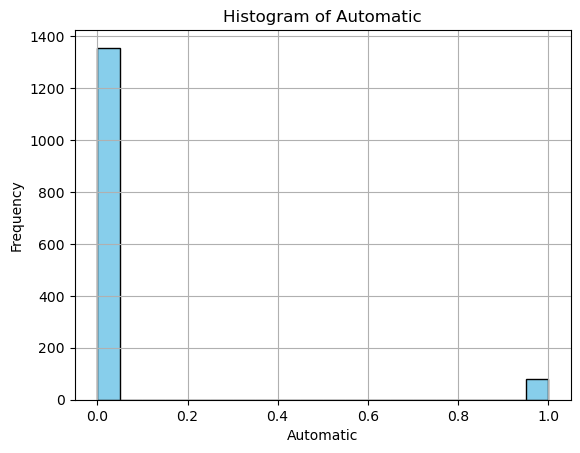

Skewness: 3.87
positively skewed


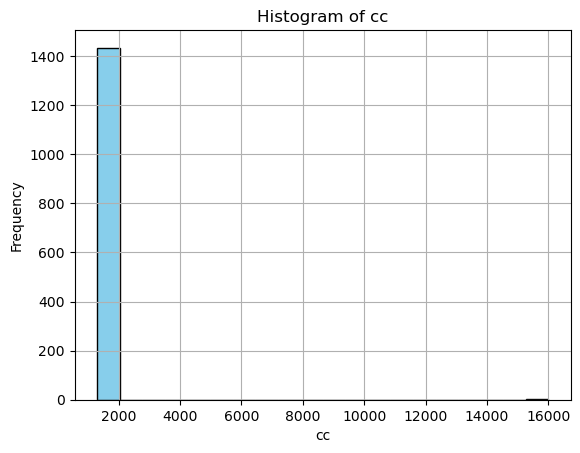

Skewness: 27.42
positively skewed


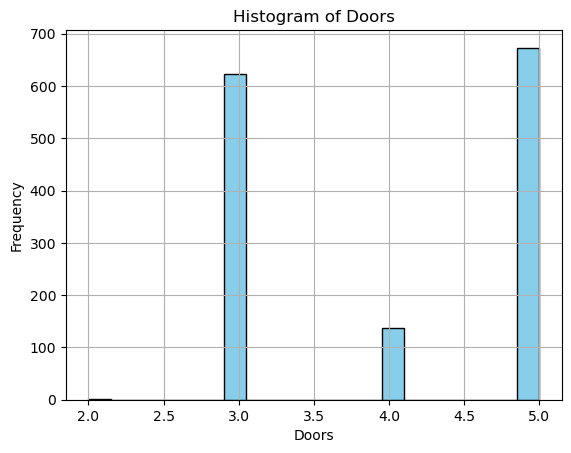

Skewness: -0.07
negatively skewed


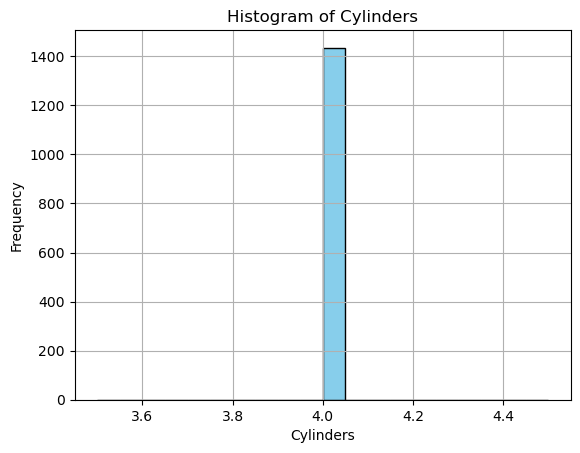

Skewness: nan
negatively skewed


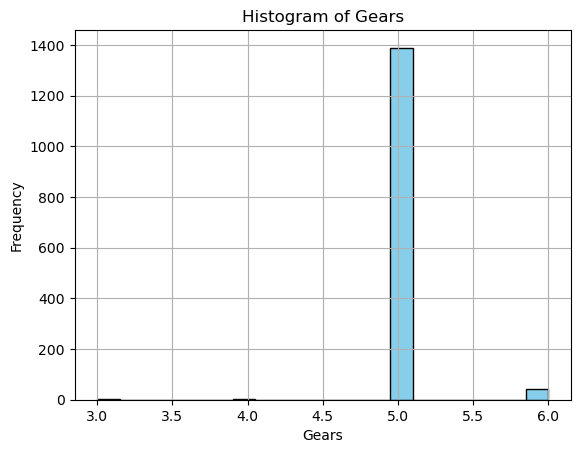

Skewness: 2.28
positively skewed


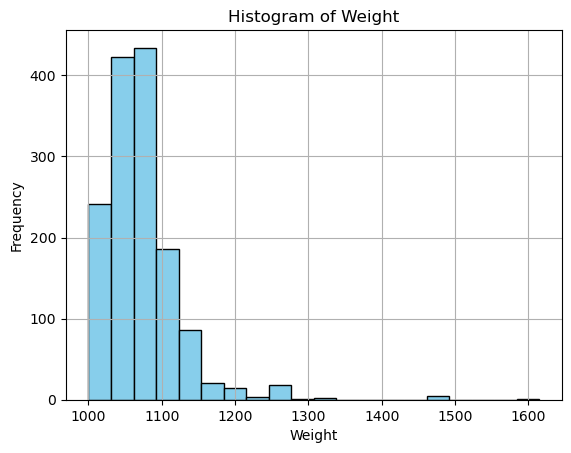

Skewness: 3.11
positively skewed


In [293]:
# visualizations histograms
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

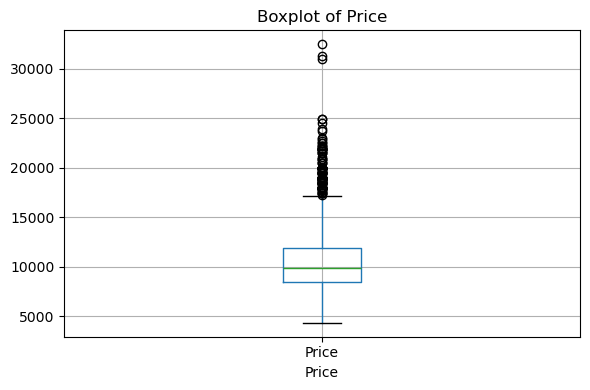

Outliers detected: 109
Lower extreme: 3200.0
Upper extreme: 17200.0


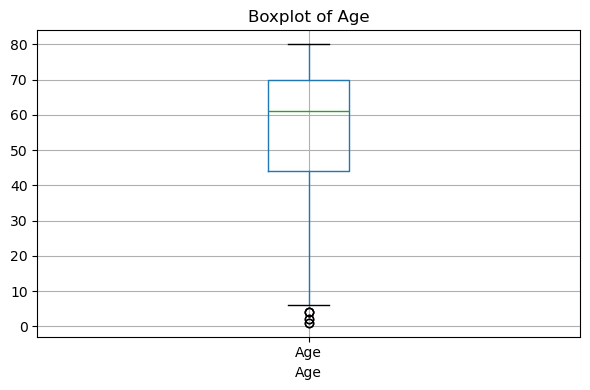

Outliers detected: 7
Lower extreme: 5.0
Upper extreme: 109.0


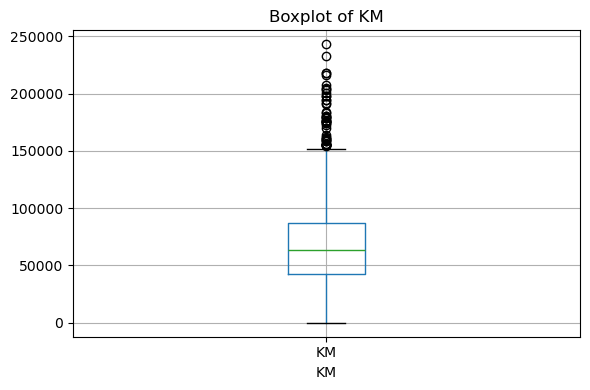

Outliers detected: 49
Lower extreme: -23062.25
Upper extreme: 153103.75


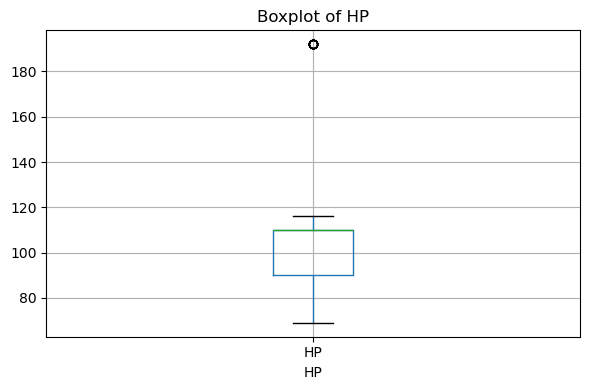

Outliers detected: 11
Lower extreme: 60.0
Upper extreme: 140.0


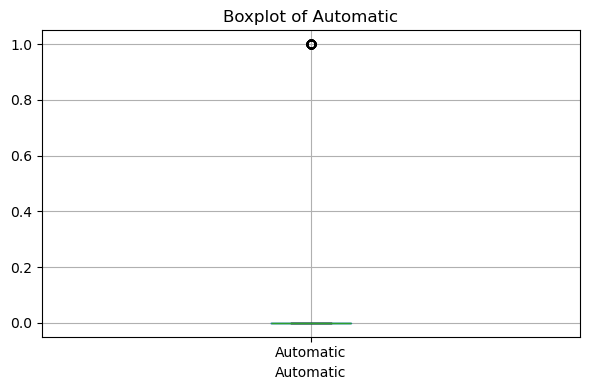

Outliers detected: 80
Lower extreme: 0.0
Upper extreme: 0.0


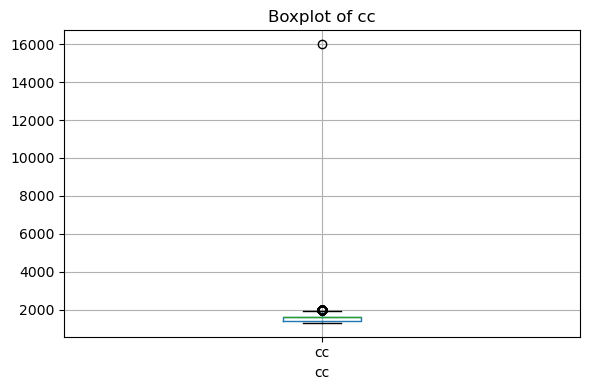

Outliers detected: 122
Lower extreme: 1100.0
Upper extreme: 1900.0


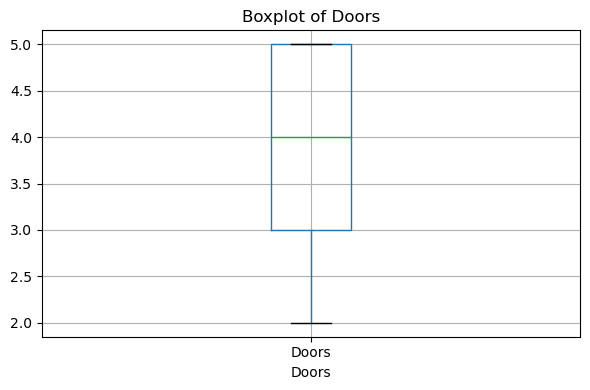

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 8.0


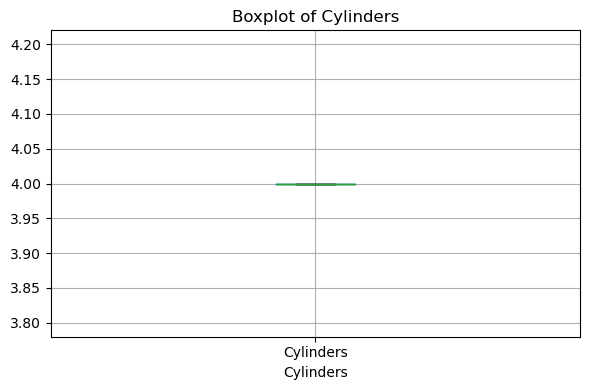

Outliers detected: 0
Lower extreme: 4.0
Upper extreme: 4.0


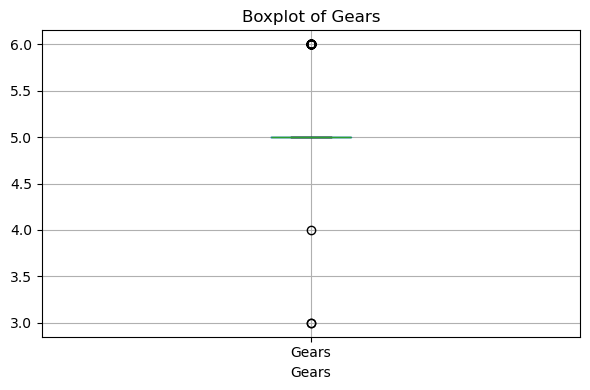

Outliers detected: 46
Lower extreme: 5.0
Upper extreme: 5.0


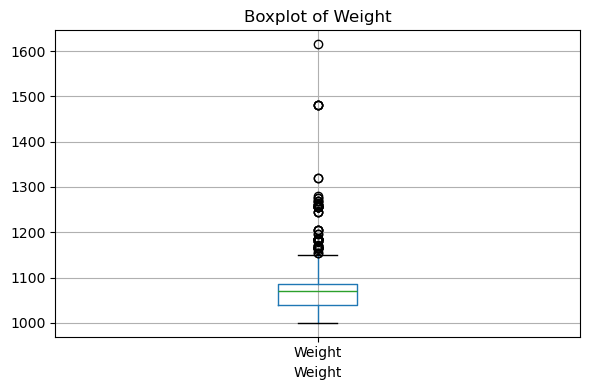

Outliers detected: 65
Lower extreme: 972.5
Upper extreme: 1152.5


In [294]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [296]:
# encoding categorical column 
label=LabelEncoder()
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df    

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,7250,70,16916,2,86,0,1300,3,4,5,1015


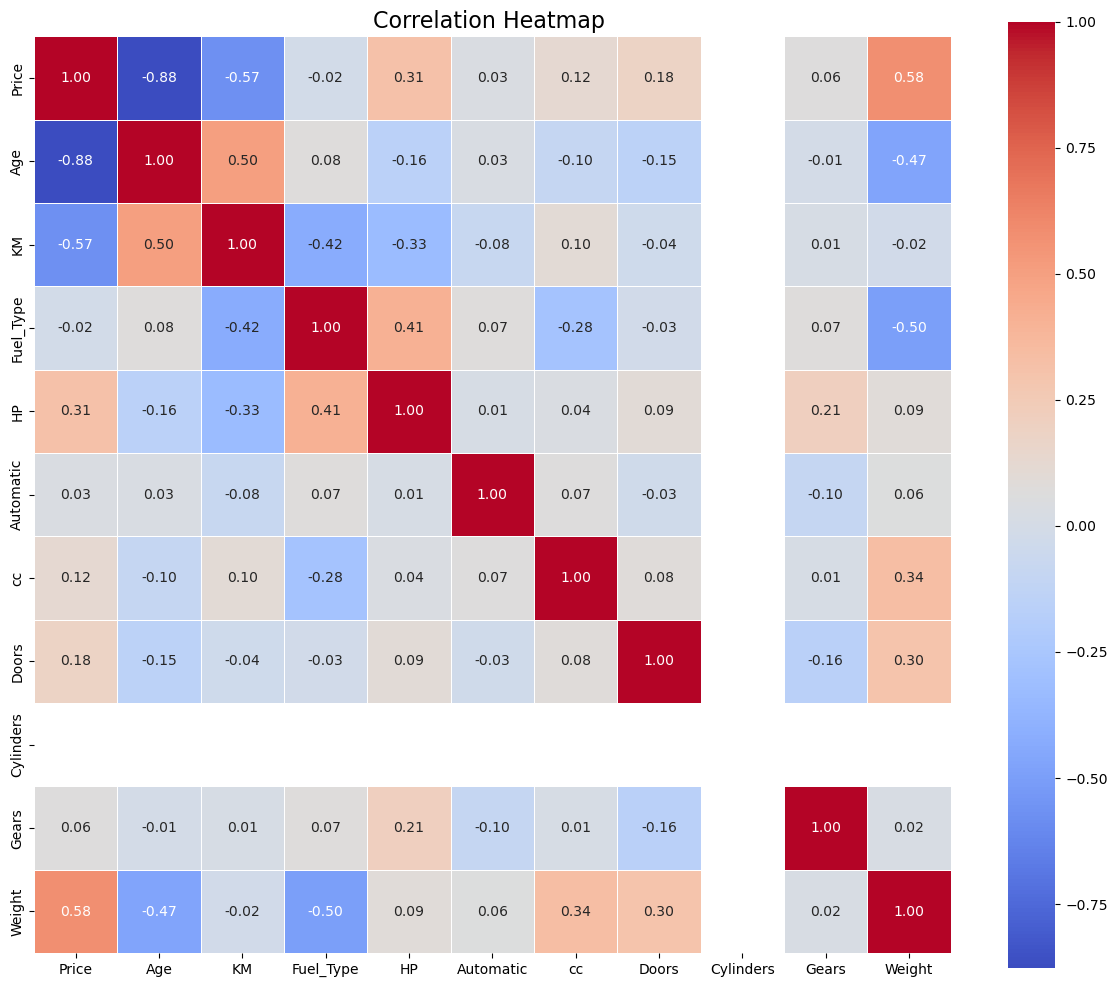

In [299]:
 #generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [301]:
# handling outliers
# IQR method to cap outliers 
for col in num_col:
    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df.loc[df.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df.loc[df.loc[:,col] < lower_bound, col] = lower_bound
    
    

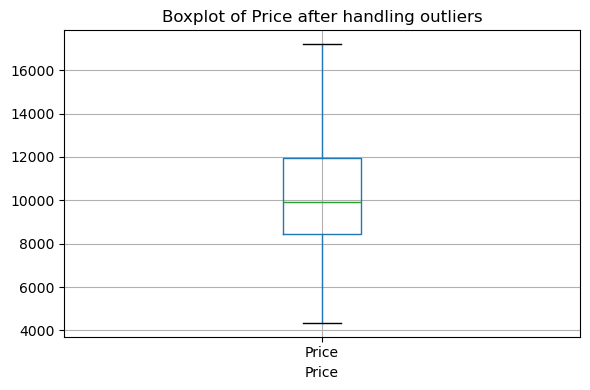

Outliers detected: 0
Lower extreme: 3200.0
Upper extreme: 17200.0


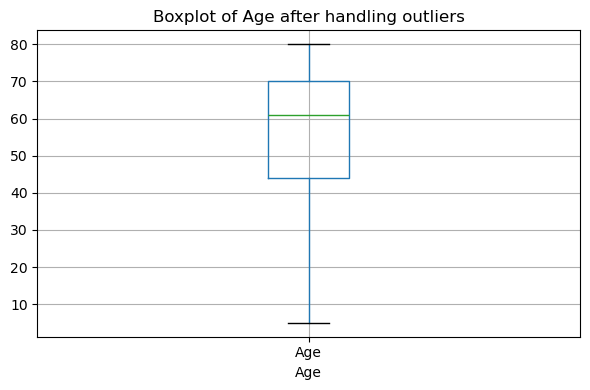

Outliers detected: 0
Lower extreme: 5.0
Upper extreme: 109.0


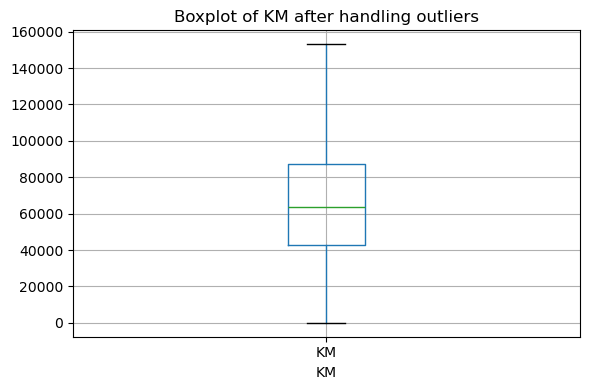

Outliers detected: 0
Lower extreme: -23062.25
Upper extreme: 153103.75


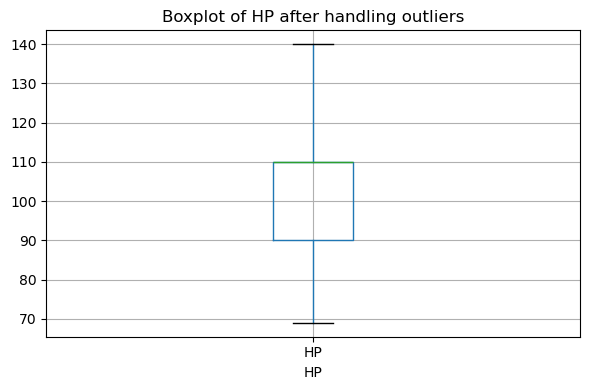

Outliers detected: 0
Lower extreme: 60.0
Upper extreme: 140.0


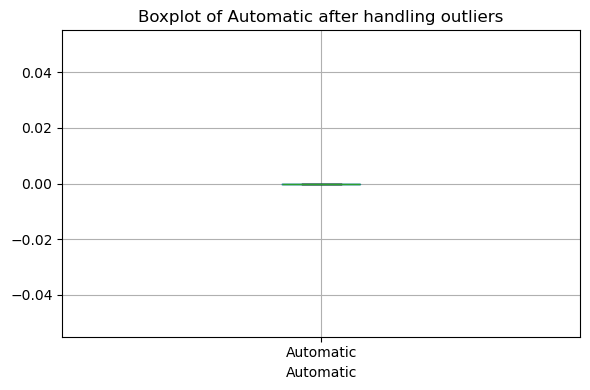

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 0.0


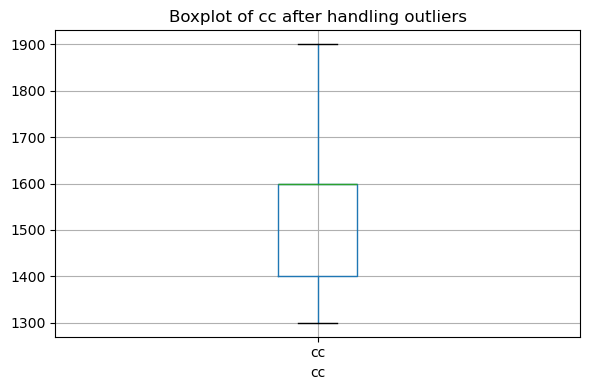

Outliers detected: 0
Lower extreme: 1100.0
Upper extreme: 1900.0


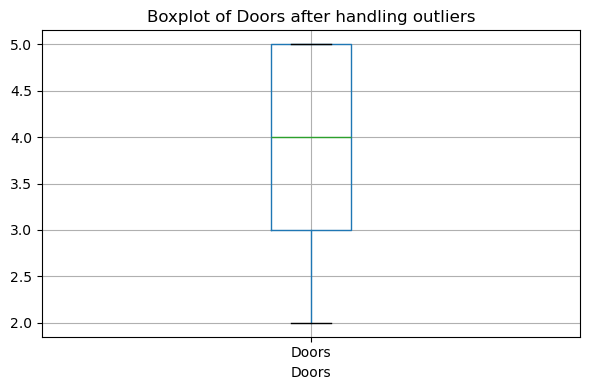

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 8.0


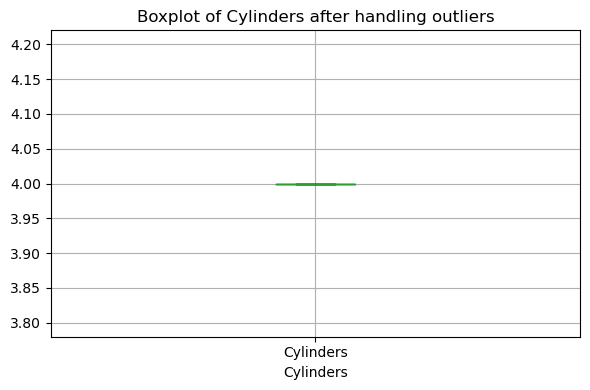

Outliers detected: 0
Lower extreme: 4.0
Upper extreme: 4.0


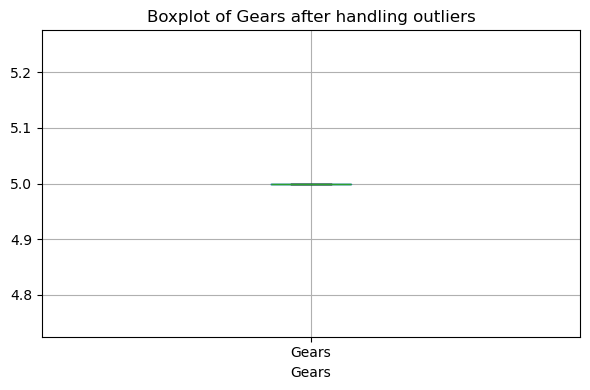

Outliers detected: 0
Lower extreme: 5.0
Upper extreme: 5.0


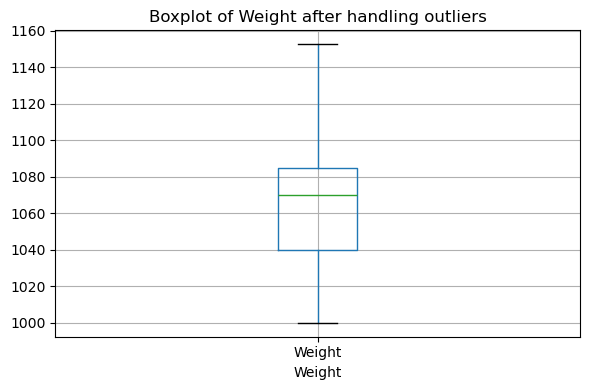

Outliers detected: 0
Lower extreme: 972.5
Upper extreme: 1152.5


In [305]:
# boxplots after handling outliers
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [306]:
df.corr()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895340,-0.607949,0.024386,0.254427,NaN,0.129352,0.183010,NaN,NaN,0.507823
Age,-0.895340,1.000000,0.530670,0.076442,-0.129602,NaN,-0.136644,-0.146704,NaN,NaN,-0.476150
KM,-0.607949,0.530670,1.000000,-0.398364,-0.329729,NaN,0.258680,-0.036618,NaN,NaN,0.000977
Fuel_Type,0.024386,0.076442,-0.398364,1.000000,0.458771,NaN,-0.598360,-0.025339,NaN,NaN,-0.529262
HP,0.254427,-0.129602,-0.329729,0.458771,1.000000,NaN,0.098192,0.120139,NaN,NaN,0.024877
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,-0.598360,0.098192,NaN,1.000000,0.138433,NaN,NaN,0.717782
Doors,0.183010,-0.146704,-0.036618,-0.025339,0.120139,NaN,0.138433,1.000000,NaN,NaN,0.381177
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
# splitting the dataset in to training and test data 80:20
x=df.drop('Price',axis=1) # dividing dependent and independent variables
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [311]:
x.head()

,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986.0,1,90,0,1900,3,4,5,1152.5
1,23,72937.0,1,90,0,1900,3,4,5,1152.5
2,24,41711.0,1,90,0,1900,3,4,5,1152.5
3,26,48000.0,1,90,0,1900,3,4,5,1152.5
4,30,38500.0,1,90,0,1900,3,4,5,1152.5


In [313]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [315]:
# model-1: building the linear regression model 
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [317]:
# predicting on test data and evaluating the model
y_pred=model1.predict(x_test)
model1_mse=mean_squared_error(y_test,y_pred)
model1_r2=r2_score(y_test,y_pred)
print("mean squared error:",model1_mse)
print("model1_r2:",model1_r2)

mean squared error: 1263981.7199494657
model1_r2: 0.857993831334012


In [319]:
# coefficients of the model
print('Intercept',model1.intercept_) 
print('Slope',model1.coef_)

Intercept -11177.897557264847
Slope [-1.05733691e+02 -1.38967521e-02  6.86846637e+02  1.87371364e+01
 -4.61852778e-14 -2.06821065e+00 -1.02628200e+02  0.00000000e+00
  0.00000000e+00  2.71071650e+01]


In [321]:
 # model-2: building another model with knn regressor algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [323]:
# predicting on test data and evaluating the model
pred_knn = model_knn.predict(x_test_scaled)
model_knn_mse=mean_squared_error(y_test,pred_knn)
model_knn_r2=r2_score(y_test,pred_knn)
print("mean squared error:",model_knn_mse)
print("model_knn_r2:",model_knn_r2)

mean squared error: 1153737.7797679815
model_knn_r2: 0.8703795480866567


In [325]:
# model-3: building another model with random forest regressor algorithm
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [326]:
# predicting on test data and evaluating the model
pred_rf = model_rf.predict(x_test)
model_rf_mse=mean_squared_error(y_test,pred_rf)
model_rf_r2=r2_score(y_test,pred_rf)
print("mean squared error:",model_rf_mse)
print("model_rf_r2:",model_rf_r2)

mean squared error: 1057963.4330101833
model_rf_r2: 0.8811396309461672


In [327]:
#5.Applying ridge method on the model.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
# predicting on test data and evaluating the model
model_ridge_mse = mean_squared_error(y_test, y_pred_ridge)
model_ridge_r2=r2_score(y_test,y_pred_ridge)
print("Ridge MSE:", model_ridge_mse)
print("ridge r2:",model_ridge_r2)


Ridge MSE: 1263728.0290321866
ridge r2: 0.858022333071513


In [331]:
# lasso model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(x_train_scaled, y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
# predicting on test data and evaluating the model
model_lasso_mse = mean_squared_error(y_test, y_pred_lasso)
model_lasso_r2=r2_score(y_test, y_pred_lasso)
print("Lasso MSE:", model_lasso_mse)
print("lasso r2:",model_lasso_r2)


Lasso MSE: 1263298.4351099017
lasso r2: 0.8580705972085833


In [ ]:
# interview questions
#1.What is Normalization & Standardization and how is it helpful?
#Both Normalization and Standardization are feature scaling techniques, which are crucial preprocessing steps in machine learning. They ensure that all input features contribute equally to the model's learning process.
#Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1.

#2.What techniques can be used to address multicollinearity in multiple linear regression?
#Multicollinearity occurs when two or more independent variables are highly correlated in a regression model.
#Techniques to Address Multicollinearity :
#Variance Inflation Factor (VIF): A diagnostic metric that quantifies how much a predictor is inflated due to multicollinearity.
# higher vif then reject or drop that feature(column).
